In [1]:
!pip install deepface

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import cv2
import requests
import matplotlib.pyplot as plt
from deepface import DeepFace

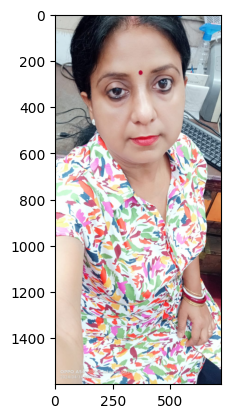

In [12]:
img = cv2.imread("./soma.jpg")
plt.imshow(img[:, :, :: -1])
plt.show()

In [13]:
from deepface import DeepFace
import cv2
image_array = cv2.imread('./soma.jpg')
try:
    analysis = DeepFace.analyze(img_path = image_array, actions = ['emotion'])
    print(analysis)
except Exception as e:
    print("Error:", e)

[{'emotion': {'angry': 2.0853101587480403, 'disgust': 0.00994098941327382, 'fear': 79.17142386266136, 'happy': 0.19773215768379912, 'sad': 3.2599596387123846, 'surprise': 0.012836949500781267, 'neutral': 15.262795404362405}, 'dominant_emotion': 'fear', 'region': {'x': 98, 'y': 105, 'w': 542, 'h': 542, 'left_eye': (458, 303), 'right_eye': (263, 338)}, 'face_confidence': 0.91}]


In [14]:
query = str(max(zip(analysis[0]['emotion'].values(),
                    analysis[0]['emotion'].keys()))[1])
print(query)

fear


In [15]:
# Spotify API URL is called using Rapid API
url = 'https://spotify23.p.rapidapi.com/search/'
# querystring is passed to spotify API
# query is the string we search for
querystring = {"q": f"{query}", "type": "multi",
			"offset": "0", "limit": "10",
			"numberOfTopResults": "5"}
# headers contain the API key and API host
headers = {
	"X-RapidAPI-Key": "6b379b24eemsh68fdfa0ecaa4074p1c02f3jsne20ee2d76145",
	"X-RapidAPI-Host": "spotify23.p.rapidapi.com"
}
# we use the requests library to sent a HTTP
# GET request to the specified URL
response = requests.get(url, headers=headers, params=querystring)
num_albums = len(response.json()['albums']['items'])
for i in range(num_albums):
  album = response.json()['albums']['items'][i]
  print('song name:', album['data']['name'])
  print('album name:', album['data']['name'], '\n')  # Assuming song name is same as album name

song name: Fearless (Taylor's Version)
album name: Fearless (Taylor's Version) 

song name: FEAR
album name: FEAR 

song name: Speak Now (Taylor's Version)
album name: Speak Now (Taylor's Version) 

song name: Fearless
album name: Fearless 

song name: No Fear
album name: No Fear 

song name: FEARLESS
album name: FEARLESS 

song name: fearmonger.
album name: fearmonger. 

song name: Red (Taylor's Version)
album name: Red (Taylor's Version) 

song name: Fear Fun
album name: Fear Fun 

song name: Lofi No need to fear
album name: Lofi No need to fear 



In [16]:
print(response.json())

{'albums': {'totalCount': 297, 'items': [{'data': {'uri': 'spotify:album:4hDok0OAJd57SGIT8xuWJH', 'name': "Fearless (Taylor's Version)", 'artists': {'items': [{'uri': 'spotify:artist:06HL4z0CvFAxyc27GXpf02', 'profile': {'name': 'Taylor Swift'}}]}, 'coverArt': {'sources': [{'url': 'https://i.scdn.co/image/ab67616d00001e02a48964b5d9a3d6968ae3e0de', 'width': 300, 'height': 300}, {'url': 'https://i.scdn.co/image/ab67616d00004851a48964b5d9a3d6968ae3e0de', 'width': 64, 'height': 64}, {'url': 'https://i.scdn.co/image/ab67616d0000b273a48964b5d9a3d6968ae3e0de', 'width': 640, 'height': 640}]}, 'date': {'year': 2021}}}, {'data': {'uri': 'spotify:album:10PZGl8wLEkDwtJuf6ZOWE', 'name': 'FEAR', 'artists': {'items': [{'uri': 'spotify:artist:01CEsyk6W2k8Pgw5TrEty0', 'profile': {'name': 'Tokt'}}]}, 'coverArt': {'sources': [{'url': 'https://i.scdn.co/image/ab67616d00001e02f5cec91d6b37309e96cdcef5', 'width': 300, 'height': 300}, {'url': 'https://i.scdn.co/image/ab67616d00004851f5cec91d6b37309e96cdcef5', 

In [17]:
def img_to_song(image_location,
				api_url='https://spotify23.p.rapidapi.com/search/',
				api_key="6b379b24eemsh68fdfa0ecaa4074p1c02f3jsne20ee2d76145",
				api_host="spotify23.p.rapidapi.com",
				offset=0,
				limit=10,
				numberOfTopResults=5):
	# read image
	img = cv2.imread(image_location)
	# call imshow() using plt object
	# plt.imshow(img[:, :, : : -1])
	# display that image
	# plt.show()
	img = cv2.imread(loc)
	# Analyze the image using DeepFace
	result = DeepFace.analyze(img, actions=['emotion'])
	query = str(max(zip(result[0]['emotion'].values(), result[0]['emotion'].keys()))[1])
	url = str(api_url)
	querystring = {
			"q": query,
			"type": "multi",
			"offset": str(offset),
			"limit": str(limit),
			"numberOfTopResults": str(numberOfTopResults)
	}
	headers = {
			"X-RapidAPI-Key": str(api_key),
			"X-RapidAPI-Host": str(api_host)
	}
	response = requests.get(url, headers=headers, params=querystring)
	output = []
	for i in range(limit):
		# Fix the f-string syntax error
		output.append(f"""song name: {response.json()['albums']['items'][i]['data']['name']}
album name: {response.json()['albums']['items'][i]['data'].get('albumOfTrack', {}).get('name', 'N/A')}\n""")
	return output
# Example usage
loc = './sample.jpg'
k = img_to_song(loc)
print(k)

['song name: Happy Birthday to You\nalbum name: N/A\n', 'song name: Happy Endings\nalbum name: N/A\n', 'song name: Happy To Have Today\nalbum name: N/A\n', 'song name: Happy Birthday to You\nalbum name: N/A\n', 'song name: Happy Hour: The Greatest Hits\nalbum name: N/A\n', 'song name: Happy To Be Here\nalbum name: N/A\n', 'song name: Happy\nalbum name: N/A\n', 'song name: Happy Together\nalbum name: N/A\n', 'song name: O Happy Day freestyle\nalbum name: N/A\n', 'song name: Happy\nalbum name: N/A\n']
